In [45]:
#导入../data/testPredict.npy
#导入../data/testY.npy
import numpy as np
import matplotlib.pyplot as plt
testPredict_6 = np.load('./testPredict-dense.npy')
testPredict_2 = np.load('../2023-4-18\data/testPredict.npy')
testPredict_1 = np.load('../2023-4-20\data/testPredict.npy')
testY = np.load('../2023-4-20\data/testY.npy')
print(testPredict_6.shape)
print(testPredict_2.shape)
print(testPredict_1.shape)
print(testY.shape)

(444, 20, 20, 1)
(423, 100, 100, 1)
(444, 100, 100, 1)
(444, 100, 100, 1)


In [46]:

testPredict_2=testPredict_2[:,40:60,40:60,:].reshape(423, 20, 20, 1)
testPredict_1=testPredict_1[:,40:60,40:60,:].reshape(444, 20, 20, 1)
testY=testY[:,40:60,40:60,:].reshape(444, 20, 20, 1)

print(testPredict_6.shape)
print(testPredict_2.shape)
print(testPredict_1.shape)
print(testY.shape)

(444, 20, 20, 1)
(423, 20, 20, 1)
(444, 20, 20, 1)
(444, 20, 20, 1)


In [47]:
data_min = 0.0
data_max = 4435
testPredict_6 = testPredict_6 * (data_max - data_min) + data_min
testPredict_2 = testPredict_2 * (data_max - data_min) + data_min
testPredict_1 = testPredict_1 * (data_max - data_min) + data_min
testY= testY * (data_max - data_min) + data_min

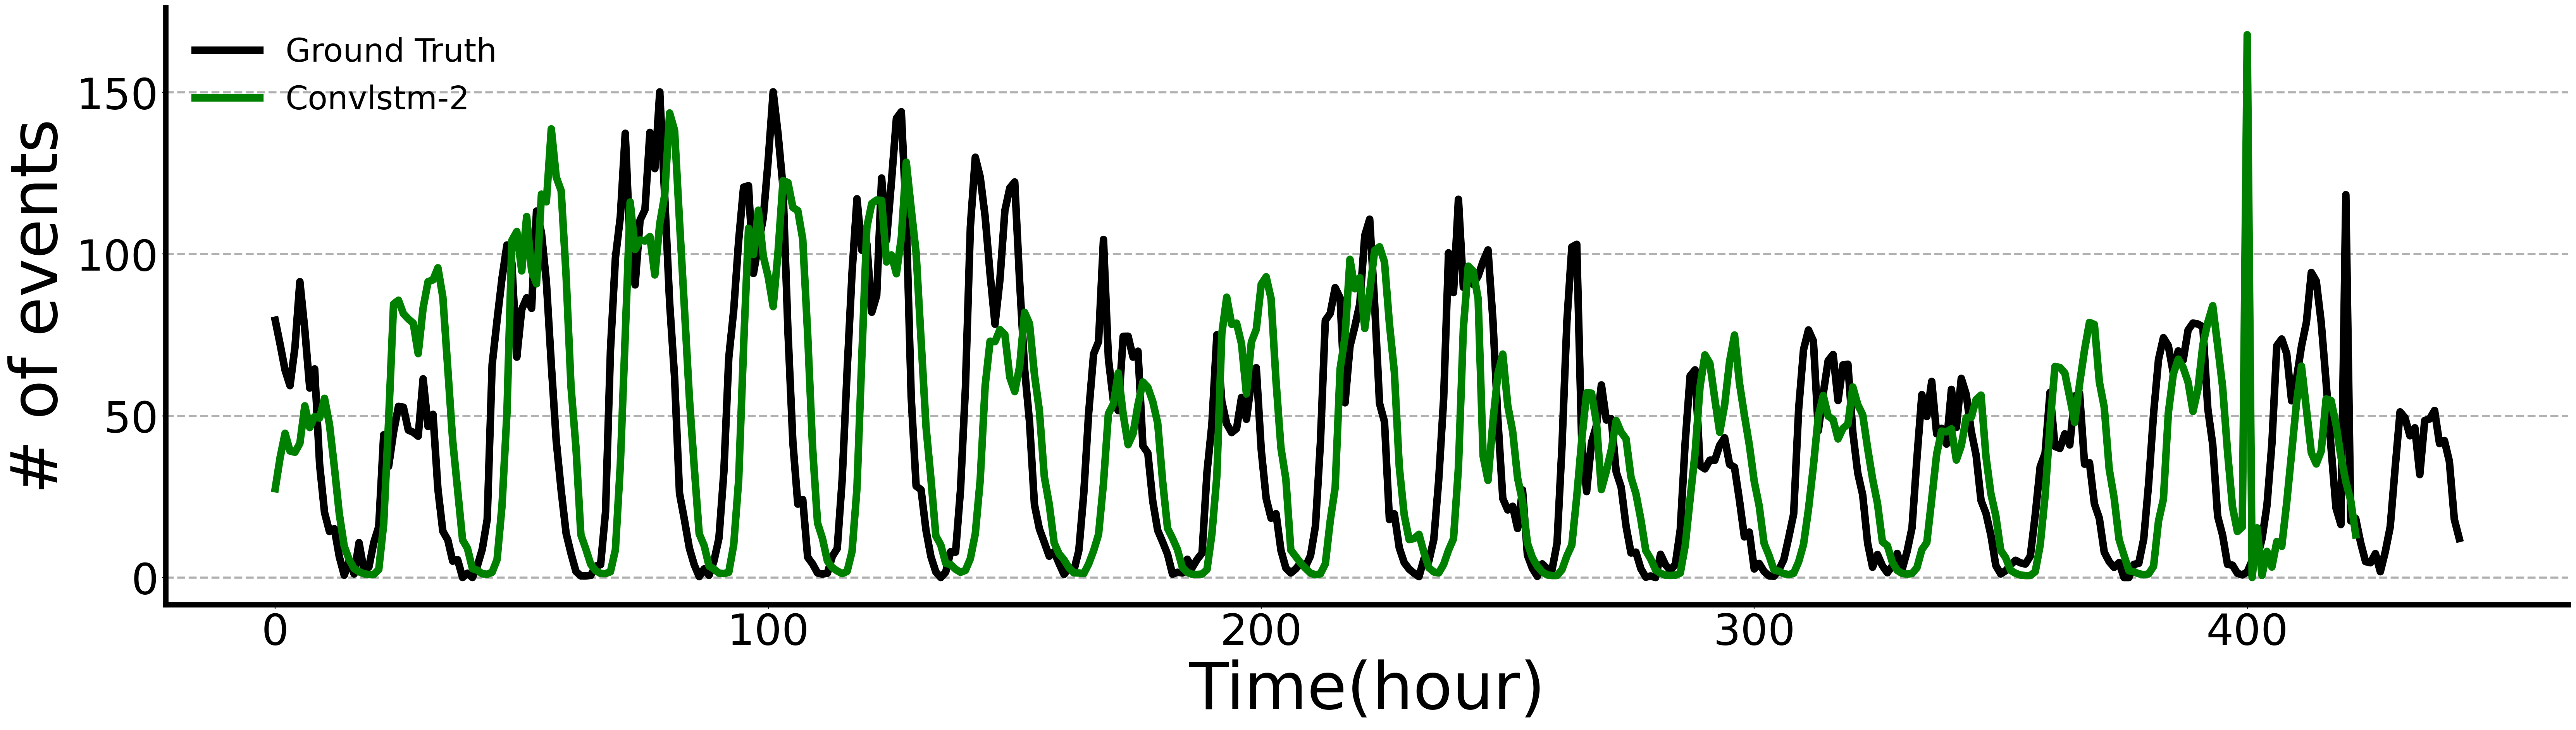

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time(hour)', fontsize=60,labelpad=5)
ax.set_ylabel('# of events', fontsize=60,labelpad=5)
ax.plot(testY[:,2,2,0],'black',label='Ground Truth',linewidth=7)
ax.plot(testPredict_2[:,2,2,0],'g',label='Convlstm-2',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)

In [4]:
from  sklearn import  metrics
import numpy as np

def GetRMSE(y_hat,y_test):
    sum = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
    return  sum

def GetMAE(y_hat,y_test):
    sum = metrics.mean_absolute_error(y_test, y_hat)
    return  sum

def GetMAPE_Order(y_hat,y_test):
    #删除test_y 为0元素
    zero_index = np.where(y_test == 0)
    y_hat = np.delete(y_hat,zero_index[0])
    y_test = np.delete(y_test,zero_index[0])
    sum = np.mean(np.abs((y_hat - y_test) / y_test)) * 100
    return sum
#计算R2
def GetR2(y_hat,y_test):
    sum = metrics.r2_score(y_test, y_hat)
    return sum



'''print("RMSE为",GetRMSE(testPredict,testY))
print("MAE为",GetMAE(testPredict,testY))
print("MAPE为",GetMAPE_Order(testPredict,testY))
print("R2为",GetR2(testPredict,testY))'''

'print("RMSE为",GetRMSE(testPredict,testY))\nprint("MAE为",GetMAE(testPredict,testY))\nprint("MAPE为",GetMAPE_Order(testPredict,testY))\nprint("R2为",GetR2(testPredict,testY))'

In [44]:
testPredict=testPredict_6
print("RMSE为",GetRMSE(testPredict.reshape(-1,1),testY.reshape(-1,1)))
print("MAE为",GetMAE(testPredict.reshape(-1,1),testY.reshape(-1,1)))
print("MAPE为",GetMAPE_Order(testPredict.reshape(-1,1),testY.reshape(-1,1)))
print("R2为",GetR2(testPredict.reshape(-1,1),testY.reshape(-1,1)))

RMSE为 49.136894109297344
MAE为 25.666034100670217
MAPE为 176.47206376116918
R2为 0.9488893315213578


In [6]:
#计算每3天的误差

rmse,mae,mape,r2=[],[],[],[]
for i in range(0, len(testY), 72):
    data=testY[i:i+72].reshape(testY[i:i+72].shape[0]*400,1)
    data1=testPredict[i:i+72].reshape(testY[i:i+72].shape[0]*400,1)
    rmse.append(GetRMSE(data1,data))
    mae.append(GetMAE(data1,data))
    mape.append(GetMAPE_Order(data1,data))
    r2.append(GetR2(data1,data))
print("RMSE为",rmse)
print("MAE为",mae)
print("MAPE为",mape)
print("R2为",r2)
    
    

RMSE为 [44.32381443734701, 50.49181203073108, 49.347160191950614, 56.09507573363718, 41.40275382689774, 54.263437594723555, 28.40561954879235]
MAE为 [23.490776982597268, 29.544452685624254, 25.58397375197747, 29.624607721633268, 20.698210302607237, 26.415249959486367, 17.499633301242895]
MAPE为 [28.313039419947938, 26.306035307166535, 29.551088286407722, 40.14057467604312, 34.60117393806434, 35.24563787960591, 21.81020092273961]
R2为 [0.9622125769632294, 0.9700693875906795, 0.939986408778305, 0.8913135397020662, 0.897524502823247, 0.8362016108403904, 0.8551655353044361]


In [11]:
#删除最后一个元素
rmse.pop()
mae.pop()
mape.pop()
r2.pop()


0.8551655353044361

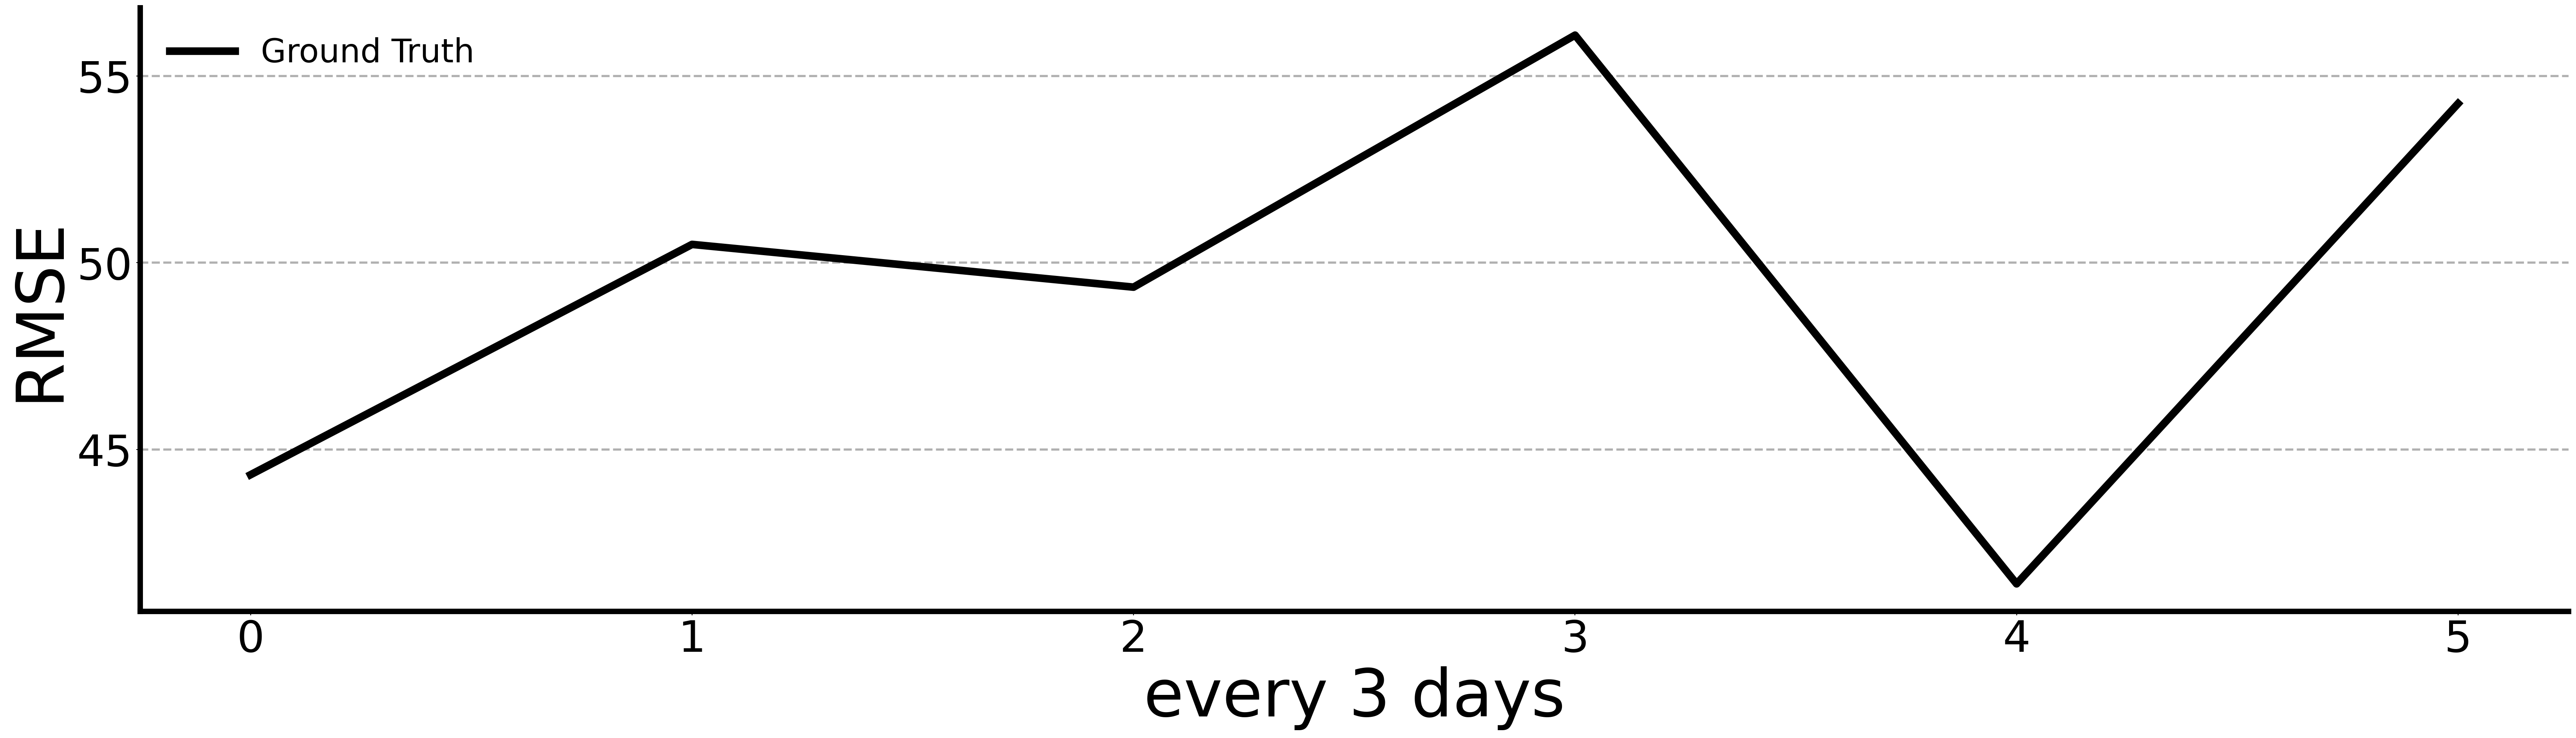

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('every 3 days', fontsize=60,labelpad=5)
ax.set_ylabel('RMSE', fontsize=60,labelpad=5)
ax.plot(rmse,'black',label='Ground Truth',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)

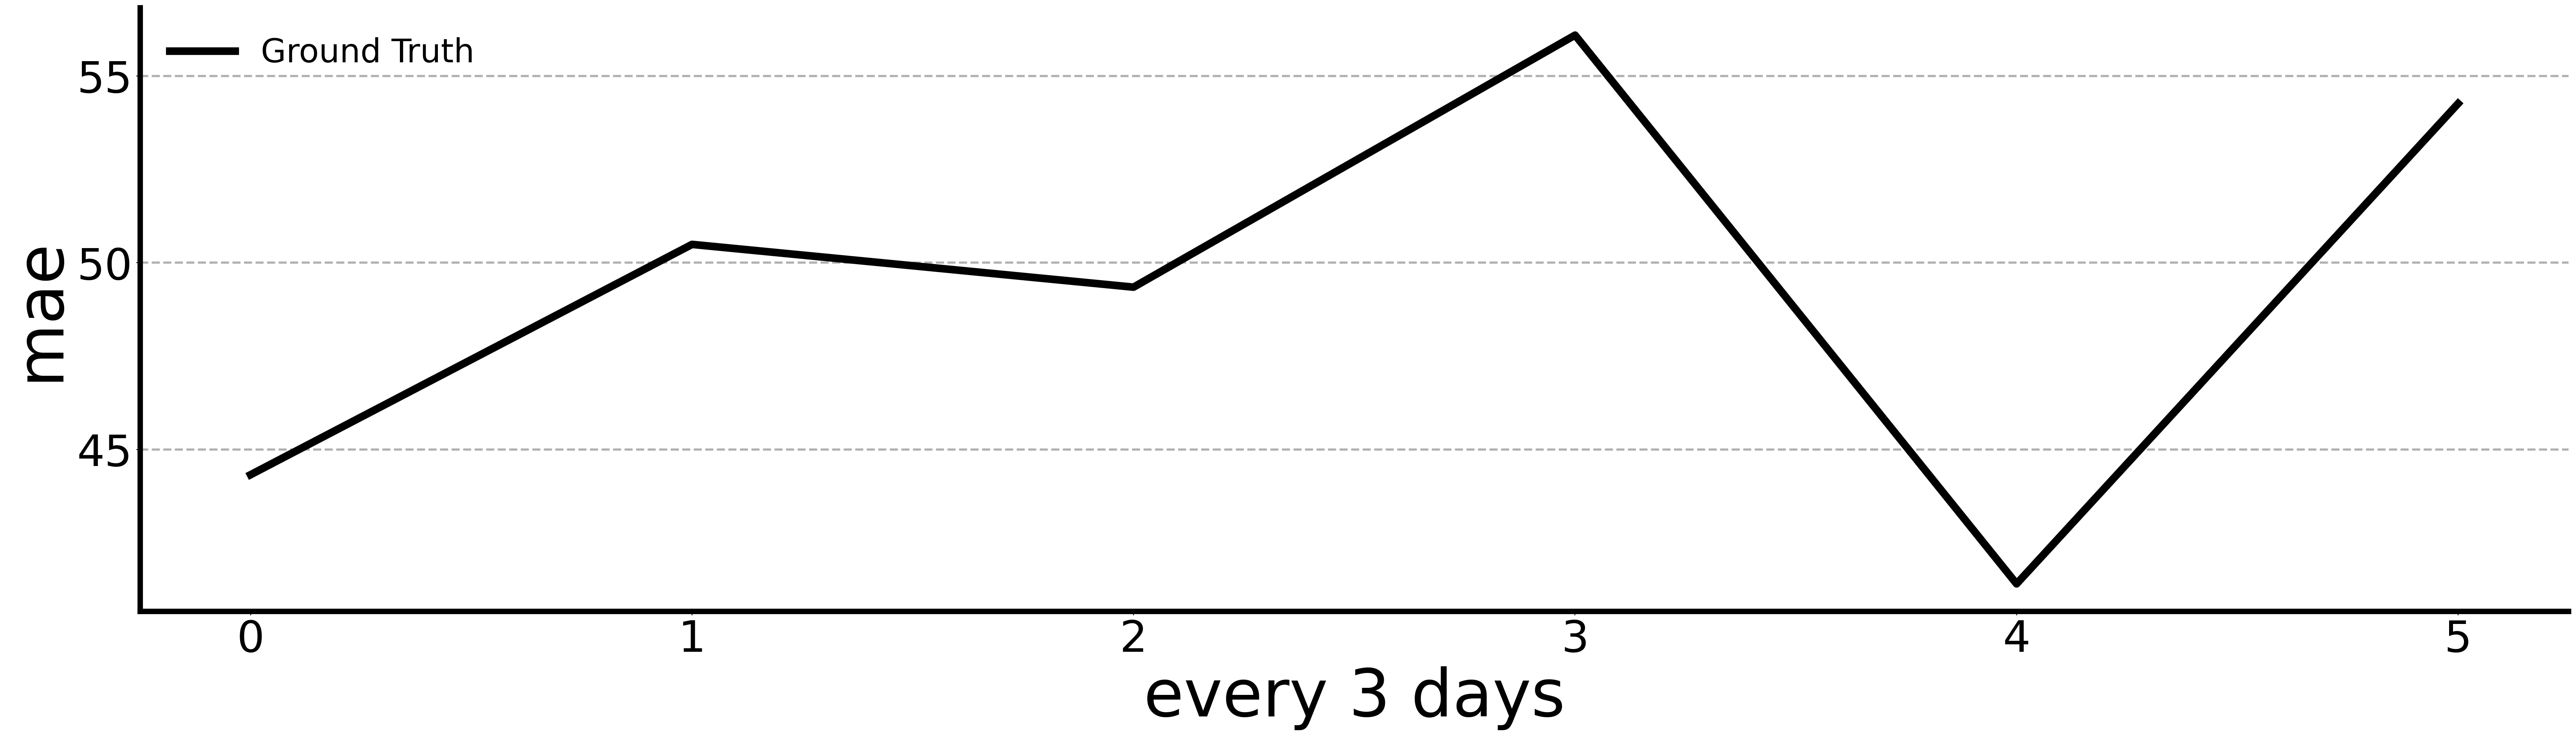

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('every 3 days', fontsize=60,labelpad=5)
ax.set_ylabel('mae', fontsize=60,labelpad=5)
ax.plot(rmse,'black',label='Ground Truth',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)

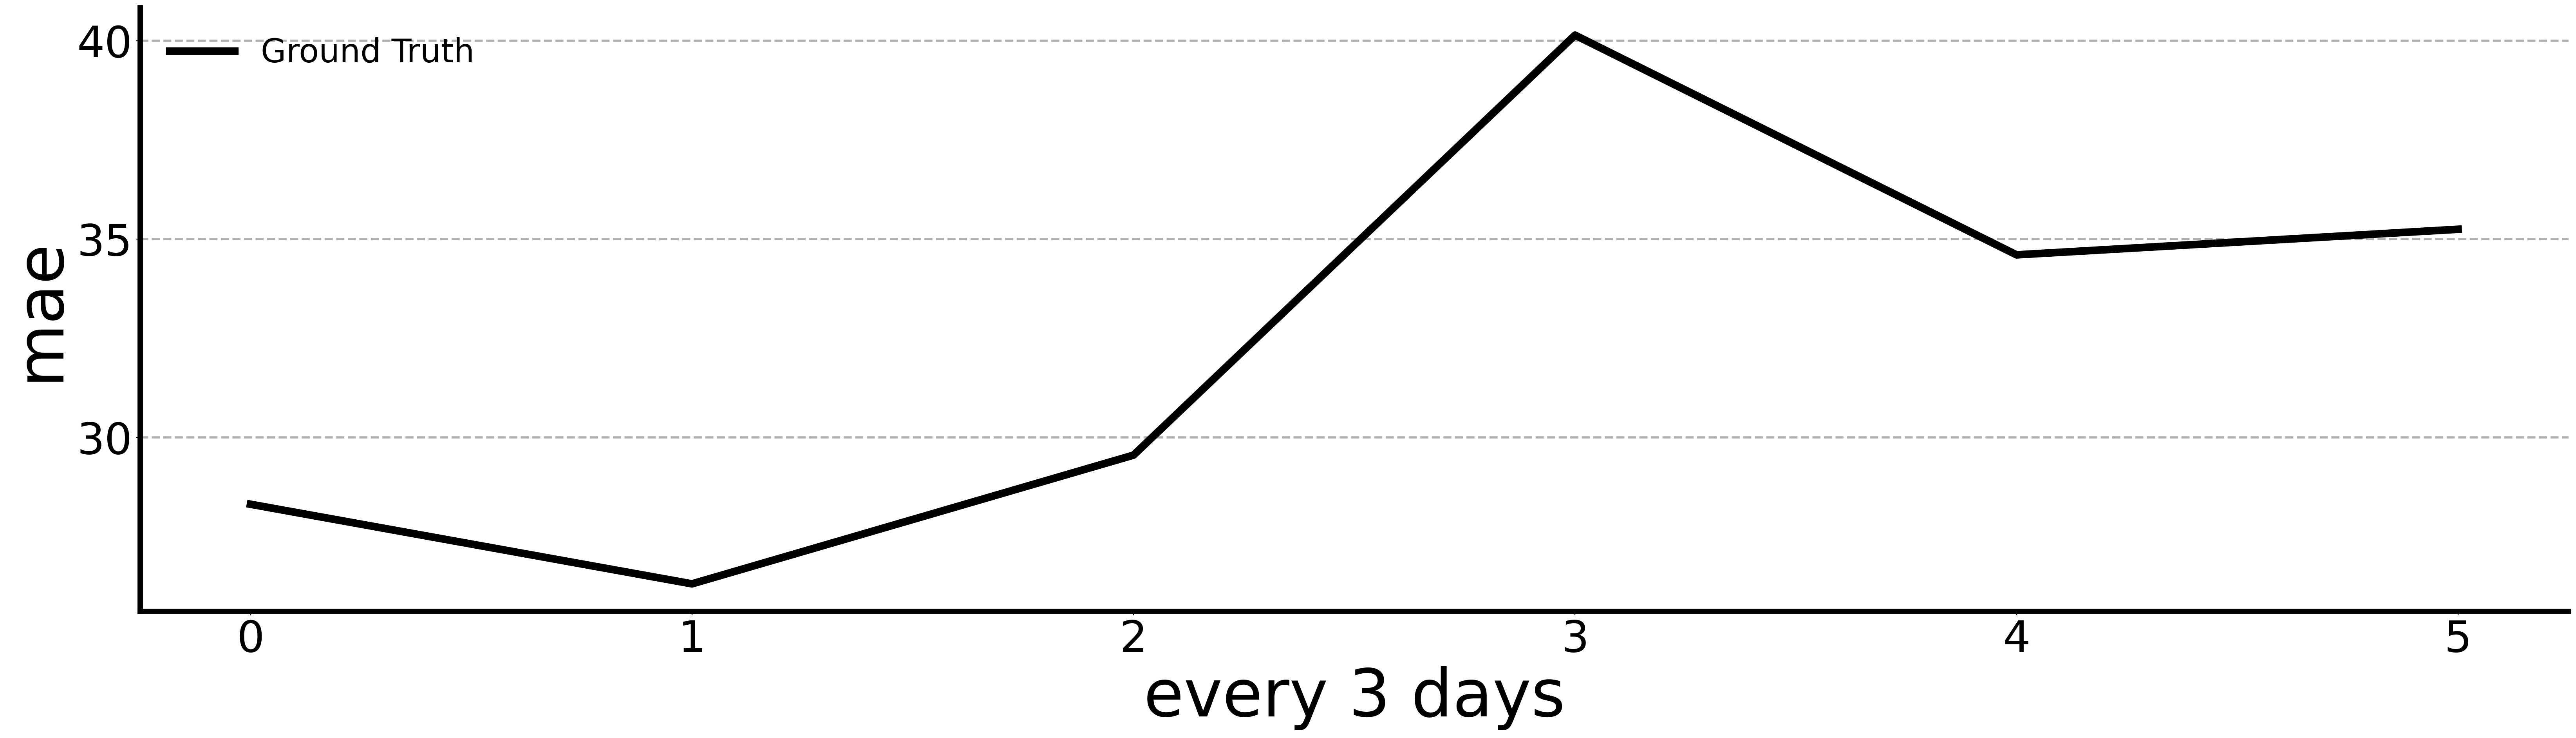

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('every 3 days', fontsize=60,labelpad=5)
ax.set_ylabel('mae', fontsize=60,labelpad=5)
ax.plot(mape,'black',label='Ground Truth',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)

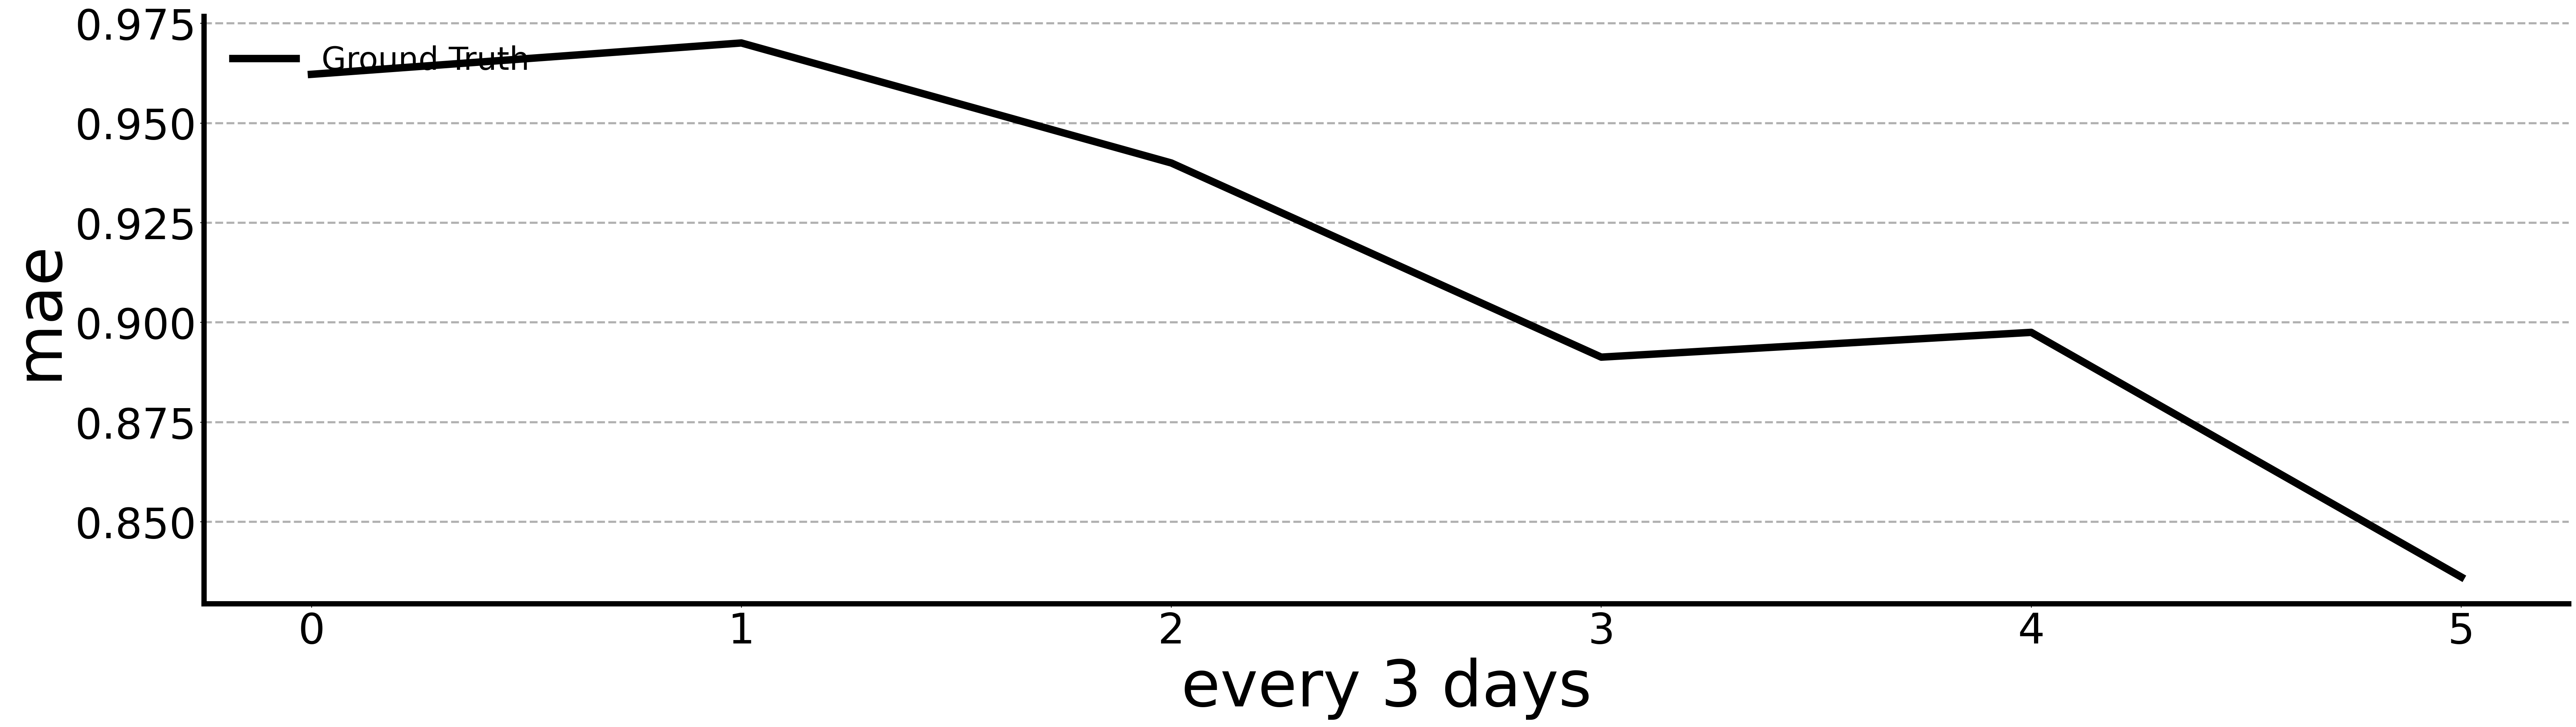

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('every 3 days', fontsize=60,labelpad=5)
ax.set_ylabel('mae', fontsize=60,labelpad=5)
ax.plot(r2,'black',label='Ground Truth',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)